In [56]:
import pandas as pd
import matplotlib .pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

%matplotlib inline

In [5]:
df = pd.read_csv('datasets/NYC_Patient Demographics2017.csv')
display(df)

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,...,Unknown Insurance Coverage,No Insurance,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
0,2017,OUTPATIENT,CENTRAL NY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,NO,YES,YES,NO,NO,NO,NO,NO,132
1,2017,SUPPORT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",UNKNOWN,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,NO,YES,UNKNOWN,YES,NO,NO,NO,UNKNOWN,146
2,2017,OUTPATIENT,CENTRAL NY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,NO,YES,NO,NO,NO,NO,NO,NO,131
3,2017,OUTPATIENT,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,NO,YES,NO,YES,NO,NO,NO,NO,112
4,2017,OUTPATIENT,CENTRAL NY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,YES,NO,NO,NOT APPLICABLE,NO,NO,NO,NO,NO,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187187,2017,RESIDENTIAL,WESTERN REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,...,NO,NO,YES,YES,NO,NO,NO,NO,NO,142
187188,2017,OUTPATIENT,WESTERN REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,...,NO,NO,YES,YES,YES,NO,NO,NO,YES,142
187189,2017,EMERGENCY,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,...,NO,NO,YES,YES,NO,NO,NO,NO,YES,888
187190,2017,RESIDENTIAL,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",MULTI-RACIAL,OTHER LIVING SITUATION,...,NO,NO,YES,NO,NO,NO,NO,NO,NO,104


In [7]:
list(df.columns)

['Survey Year',
 'Program Category',
 'Region Served',
 'Age Group',
 'Sex',
 'Transgender',
 'Sexual Orientation',
 'Hispanic Ethnicity',
 'Race',
 'Living Situation',
 'Household Composition',
 'Preferred Language',
 'Veteran Status',
 'Employment Status',
 'Number Of Hours Worked Each Week',
 'Education Status',
 'Special Education Services',
 'Mental Illness',
 'Intellectual Disability',
 'Autism Spectrum',
 'Other Developmental Disability',
 'Alcohol Related Disorder',
 'Drug Substance Disorder',
 'Mobility Impairment Disorder',
 'Hearing Visual Impairment',
 'Hyperlipidemia',
 'High Blood Pressure',
 'Diabetes',
 'Obesity',
 'Heart Attack',
 'Stroke',
 'Other Cardiac',
 'Pulmonary Asthma',
 'Alzheimer or Dementia',
 'Kidney Disease',
 'Liver Disease',
 'Endocrine Condition',
 'Neurological Condition',
 'Traumatic Brain Injury',
 'Joint Disease',
 'Cancer',
 'Other Chronic Med Condition',
 'No Chronic Med Condition',
 'Unknown Chronic Med Condition',
 'Smokes',
 'Received Smoking 

In [8]:
df2 = pd.DataFrame(df)
df2.drop(['Survey Year',
         'Veteran Status',
         'Employment Status',
         'Number Of Hours Worked Each Week',
         'Special Education Services',
         'Mental Illness',
         'Intellectual Disability',
         'Autism Spectrum',
         'Other Developmental Disability',
         'Alcohol Related Disorder',
         'Drug Substance Disorder',
         'Mobility Impairment Disorder',
         'Hearing Visual Impairment',
         'Hyperlipidemia',
         'High Blood Pressure',
         'Diabetes',
         'Obesity',
         'Heart Attack',
         'Stroke',
         'Other Cardiac',
         'Pulmonary Asthma',
         'Alzheimer or Dementia',
         'Kidney Disease',
         'Liver Disease',
         'Endocrine Condition',
         'Neurological Condition',
         'Traumatic Brain Injury',
         'Joint Disease',
         'Cancer',
         'Other Chronic Med Condition',
         'No Chronic Med Condition',
         'Unknown Chronic Med Condition',
         'Smokes',
         'Received Smoking Medication',
         'Received Smoking Counseling',
         'Serious Mental Illness',
         'Principal Diagnosis Class',
         'Additional Diagnosis Class',
         'SSI Cash Assistance',
         'SSDI Cash Assistance',
         'Veterans Disability Benefits',
         'Veterans Cash Assistance',
         'Public Assistance Cash Program',
         'Other Cash Benefits',
         'Criminal Justice Status',
         'Three Digit Residence Zip Code'],axis = 1, inplace = True)
display(df2)

,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,Household Composition,...,Education Status,Medicaid and Medicare Insurance,Unknown Insurance Coverage,No Insurance,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance
0,OUTPATIENT,CENTRAL NY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,YES,NO,NO,NO,NO
1,SUPPORT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",UNKNOWN,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,...,MIDDLE SCHOOL TO HIGH SCHOOL,YES,NO,NO,YES,UNKNOWN,YES,NO,NO,NO
2,OUTPATIENT,CENTRAL NY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,NO,NO,NO,NO,NO
3,OUTPATIENT,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,...,MIDDLE SCHOOL TO HIGH SCHOOL,YES,NO,NO,YES,NO,YES,NO,NO,NO
4,OUTPATIENT,CENTRAL NY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,...,SOME COLLEGE,NO,YES,NO,NO,NOT APPLICABLE,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187187,RESIDENTIAL,WESTERN REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,YES,NO,NO,NO,NO
187188,OUTPATIENT,WESTERN REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,...,MIDDLE SCHOOL TO HIGH SCHOOL,YES,NO,NO,YES,YES,YES,NO,NO,NO
187189,EMERGENCY,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,YES,NO,NO,NO,NO
187190,RESIDENTIAL,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",MULTI-RACIAL,OTHER LIVING SITUATION,NOT APPLICABLE,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,NO,NO,NO,NO,NO


In [31]:
df2.fillna(0, inplace = True)
display(df2)

,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,Household Composition,...,Education Status,Medicaid and Medicare Insurance,Unknown Insurance Coverage,No Insurance,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance
0,OUTPATIENT,CENTRAL NY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,YES,NO,NO,NO,NO
1,SUPPORT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",UNKNOWN,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,...,MIDDLE SCHOOL TO HIGH SCHOOL,YES,NO,NO,YES,UNKNOWN,YES,NO,NO,NO
2,OUTPATIENT,CENTRAL NY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,NO,NO,NO,NO,NO
3,OUTPATIENT,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,...,MIDDLE SCHOOL TO HIGH SCHOOL,YES,NO,NO,YES,NO,YES,NO,NO,NO
4,OUTPATIENT,CENTRAL NY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,...,SOME COLLEGE,NO,YES,NO,NO,NOT APPLICABLE,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187187,RESIDENTIAL,WESTERN REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,YES,NO,NO,NO,NO
187188,OUTPATIENT,WESTERN REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,...,MIDDLE SCHOOL TO HIGH SCHOOL,YES,NO,NO,YES,YES,YES,NO,NO,NO
187189,EMERGENCY,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,OTHER LIVING SITUATION,NOT APPLICABLE,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,YES,NO,NO,NO,NO
187190,RESIDENTIAL,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",MULTI-RACIAL,OTHER LIVING SITUATION,NOT APPLICABLE,...,MIDDLE SCHOOL TO HIGH SCHOOL,NO,NO,NO,YES,NO,NO,NO,NO,NO


In [14]:
region_counts = df2['Region Served'].value_counts()
display(region_counts)

NEW YORK CITY REGION    93938
WESTERN REGION          31364
HUDSON RIVER REGION     27823
CENTRAL NY REGION       20190
LONG ISLAND REGION      13877
Name: Region Served, dtype: int64

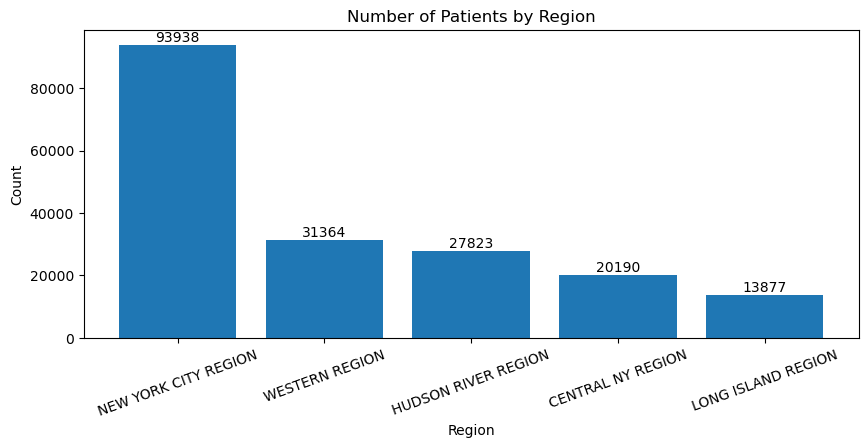

In [28]:
region_counts = df2['Region Served'].value_counts()
plt.figure(figsize=(10,4))
plt.bar(region_counts.index,region_counts.values)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Patients by Region')
plt.xticks(rotation = 20)

for i, v in enumerate(region_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.show()

           Race  Percentage
0    WHITE ONLY       49.52
1    BLACK ONLY       26.06
2         OTHER       17.79
3  UNKNOWN RACE        3.98
4  MULTI-RACIAL        2.65


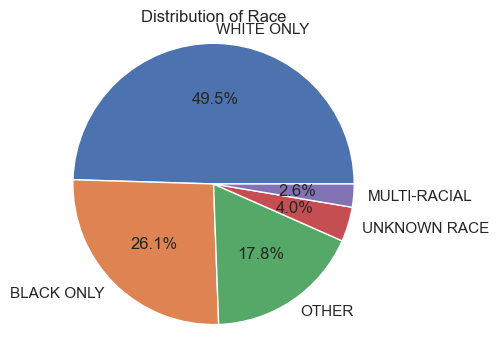

In [120]:
race_counts = df['Race']
plt.figure(figsize=(4,4))

frequency_table = df2['Race'].value_counts()
percentage_table = frequency_table / frequency_table.sum() * 100

percentage_table = percentage_table.round(2)
percentage_table = percentage_table.reset_index()
percentage_table.columns = ['Race','Percentage']
print(percentage_table)

labels = percentage_table['Race']
sizes = percentage_table['Percentage']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Race')
plt.show()

In [57]:
contingency_table = pd.crosstab(df['Age Group'], df['Medicaid and Medicare Insurance'])
chi2,p,dof,expected = chi2_contingency(contingency_table)

print("Chi-square statistic:",chi2)
print("p-value:",p)
print("Degrees of freedom:",dof)
print("Expected frequencies:",expected)

Chi-square statistic: 8966.539751907098
p-value: 0.0
Degrees of freedom: 4
Expected frequencies: [[1.17099621e+05 8.02573873e+03 2.30796399e+04]
 [3.07783047e+04 2.10947422e+03 6.06622107e+03]
 [2.60739348e+01 1.78704752e+00 5.13901769e+00]]


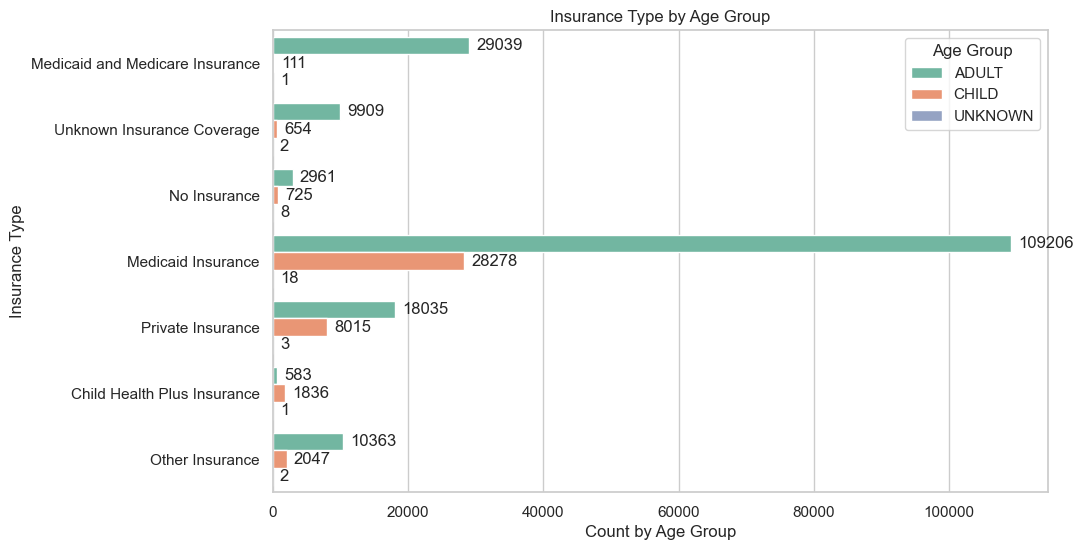

In [86]:
melted_df = pd.melt(df2, id_vars=['Age Group'], value_vars=['Medicaid and Medicare Insurance', 'Unknown Insurance Coverage', 'No Insurance', 'Medicaid Insurance', 'Private Insurance', 'Child Health Plus Insurance', 'Other Insurance'], var_name='Insurance Type')

filtered_df = melted_df[melted_df['value'] == 'YES']

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=filtered_df, y='Insurance Type', hue='Age Group', palette='Set2')
plt.xlabel('Count by Age Group')
plt.ylabel('Insurance Type')
plt.title('Insurance Type by Age Group')
plt.legend(title='Age Group')

# Add count values as annotations
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

Chi-square statistic: 15621.409532247111
p-value: 0.0
Correlation matrix:


Age Group,ADULT,CHILD,UNKNOWN
Age Group,,,
ADULT,1.000000,0.943011,0.855131
CHILD,0.943011,1.000000,0.887708
UNKNOWN,0.855131,0.887708,1.000000


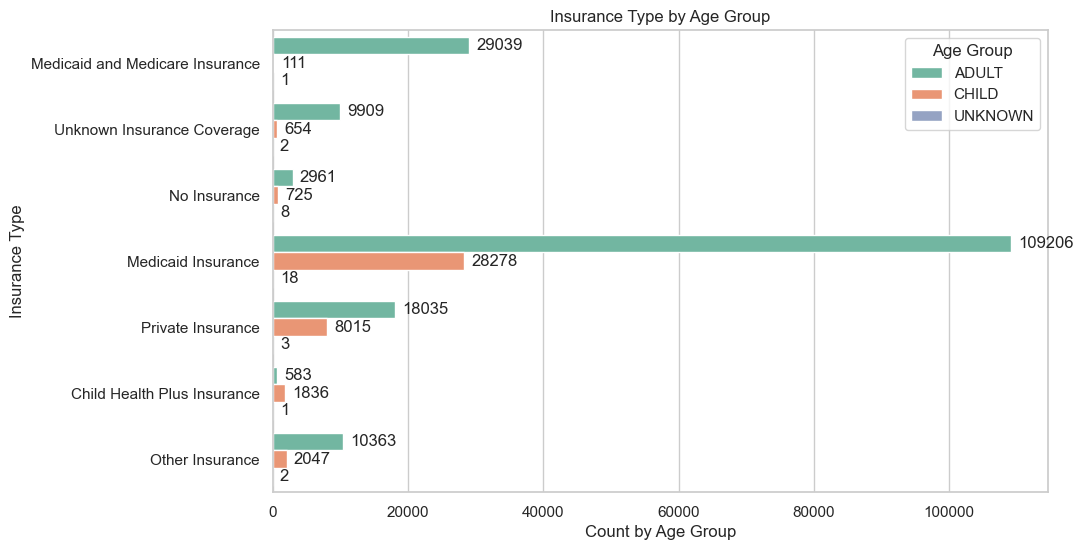

In [107]:
melted_df = pd.melt(df2, id_vars=['Age Group'], value_vars=['Medicaid and Medicare Insurance', 'Unknown Insurance Coverage', 'No Insurance', 'Medicaid Insurance', 'Private Insurance', 'Child Health Plus Insurance', 'Other Insurance'], var_name='Insurance Type')

filtered_df = melted_df[melted_df['value'] == 'YES']

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=filtered_df, y='Insurance Type', hue='Age Group', palette='Set2')
plt.xlabel('Count by Age Group')
plt.ylabel('Insurance Type')
plt.title('Insurance Type by Age Group')
plt.legend(title='Age Group')

# Add count values as annotations
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Statistical analysis - Chi-square test
table = filtered_df.pivot_table(index='Insurance Type', columns='Age Group', aggfunc='size')
chi2, p_val, _, _ = chi2_contingency(table)
print('Chi-square statistic:', chi2)
print('p-value:', p_val)

# Statistical analysis - Correlation matrix
corr_matrix = filtered_df.groupby(['Insurance Type', 'Age Group']).size().unstack().corr()
print('Correlation matrix:')
display(corr_matrix)

plt.show()

Chi-square statistic: 9627.951756413155
p-value: 0.0
Correlation matrix:


Race,BLACK ONLY,MULTI-RACIAL,OTHER,UNKNOWN RACE,WHITE ONLY
Race,,,,,
BLACK ONLY,1.000000,0.987428,0.997631,0.978687,0.979246
MULTI-RACIAL,0.987428,1.000000,0.993453,0.977438,0.991946
OTHER,0.997631,0.993453,1.000000,0.986171,0.980155
UNKNOWN RACE,0.978687,0.977438,0.986171,1.000000,0.954426
WHITE ONLY,0.979246,0.991946,0.980155,0.954426,1.000000


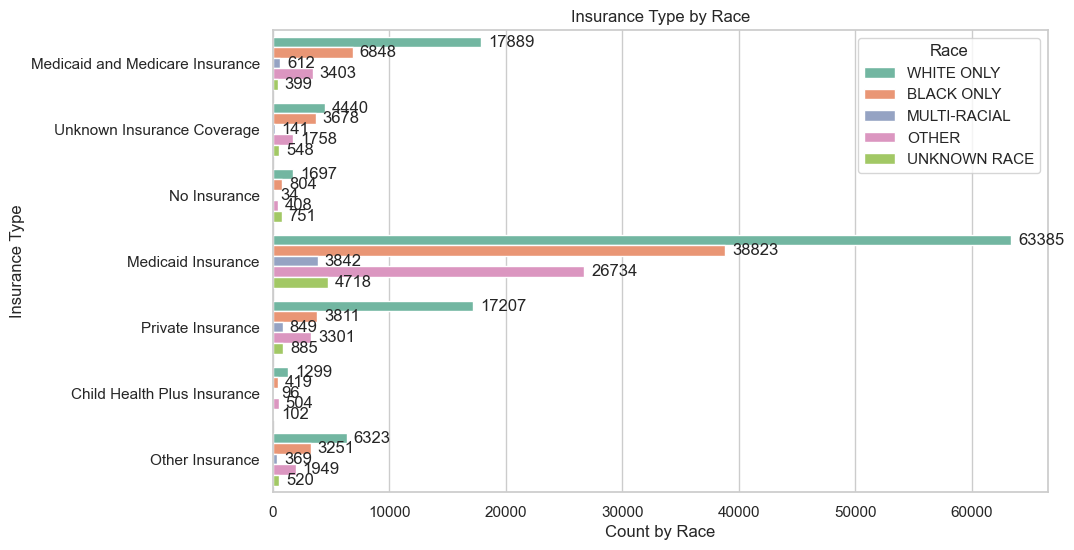

In [106]:
melted_df = pd.melt(df2, id_vars=['Race'], value_vars=['Medicaid and Medicare Insurance', 'Unknown Insurance Coverage', 'No Insurance', 'Medicaid Insurance', 'Private Insurance', 'Child Health Plus Insurance', 'Other Insurance'], var_name='Insurance Type')

filtered_df = melted_df[melted_df['value'] == 'YES']

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=filtered_df, y='Insurance Type', hue='Race', palette='Set2')
plt.xlabel('Count by Race')
plt.ylabel('Insurance Type')
plt.title('Insurance Type by Race')
plt.legend(title='Race')

# Add count values as annotations
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Statistical analysis - Chi-square test
table = filtered_df.pivot_table(index='Insurance Type', columns='Race', aggfunc='size')
chi2, p_val, _, _ = chi2_contingency(table)
print('Chi-square statistic:', chi2)
print('p-value:', p_val)

# Statistical analysis - Correlation matrix
corr_matrix = filtered_df.groupby(['Insurance Type', 'Race']).size().unstack().corr()
print('Correlation matrix:')
display(corr_matrix)

plt.show()

Chi-square statistic: 9627.951756413155
p-value: 0.0
Correlation matrix:


Race,BLACK ONLY,MULTI-RACIAL,OTHER,UNKNOWN RACE,WHITE ONLY
Race,,,,,
BLACK ONLY,1.000000,0.987428,0.997631,0.978687,0.979246
MULTI-RACIAL,0.987428,1.000000,0.993453,0.977438,0.991946
OTHER,0.997631,0.993453,1.000000,0.986171,0.980155
UNKNOWN RACE,0.978687,0.977438,0.986171,1.000000,0.954426
WHITE ONLY,0.979246,0.991946,0.980155,0.954426,1.000000


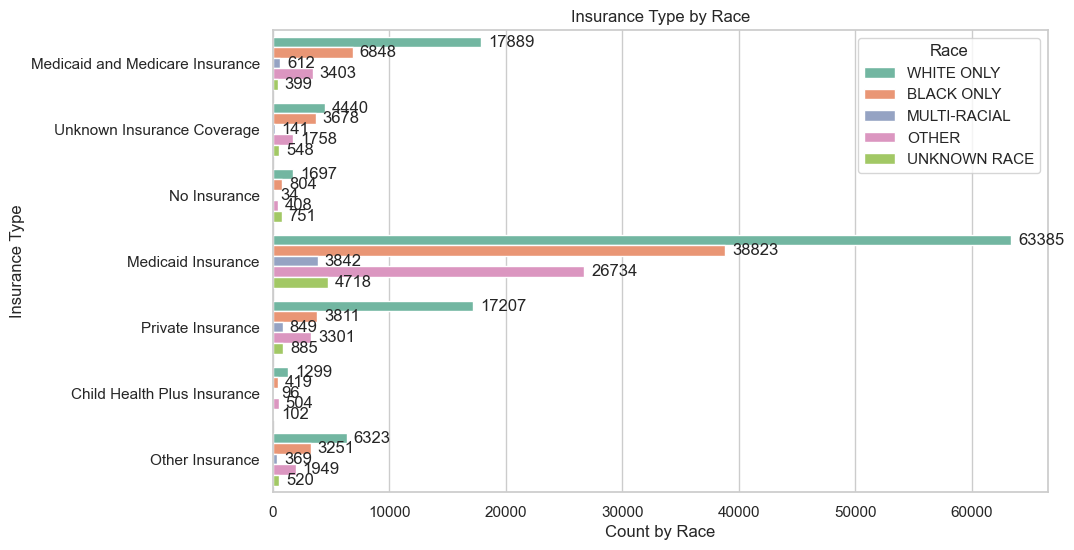

In [105]:
melted_df = pd.melt(df2, id_vars=['Race'], value_vars=['Medicaid and Medicare Insurance', 'Unknown Insurance Coverage', 'No Insurance', 'Medicaid Insurance', 'Private Insurance', 'Child Health Plus Insurance', 'Other Insurance'], var_name='Insurance Type')

filtered_df = melted_df[melted_df['value'] == 'YES']

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=filtered_df, y='Insurance Type', hue='Race', palette='Set2')
plt.xlabel('Count by Race')
plt.ylabel('Insurance Type')
plt.title('Insurance Type by Race')
plt.legend(title='Race')

# Add count values as annotations
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Statistical analysis - Chi-square test
table = filtered_df.pivot_table(index='Insurance Type', columns='Race', aggfunc='size')
chi2, p_val, _, _ = chi2_contingency(table)
print('Chi-square statistic:', chi2)
print('p-value:', p_val)

# Statistical analysis - Correlation matrix
corr_matrix = filtered_df.groupby(['Insurance Type', 'Race']).size().unstack().corr()
print('Correlation matrix:')
display(corr_matrix)

plt.show()


In [108]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

columns_of_interest = ['Age Group', 'Hispanic Ethnicity', 'Transgender', 'Sexual Orientation', 'Race', 'Education Status']

subset_df = df2[columns_of_interest]

corr_matrix = pd.DataFrame(index=columns_of_interest, columns=columns_of_interest)

for col1 in columns_of_interest:
    for col2 in columns_of_interest:
        contingency_table = pd.crosstab(subset_df[col1], subset_df[col2])
        
        chi2, _, _, _ = chi2_contingency(contingency_table)
        
        num_rows = contingency_table.shape[0]
        num_cols = contingency_table.shape[1]
        cramer_v = np.sqrt(chi2 / (subset_df.shape[0] * min(num_rows - 1, num_cols - 1)))
        
        corr_matrix.loc[col1, col2] = cramer_v

display(corr_matrix)


,Age Group,Hispanic Ethnicity,Transgender,Sexual Orientation,Race,Education Status
Age Group,1.0,0.07275,0.082507,0.186745,0.083469,0.408155
Hispanic Ethnicity,0.07275,1.0,0.158519,0.14819,0.48153,0.189028
Transgender,0.082507,0.158519,1.0,0.390744,0.129707,0.151819
Sexual Orientation,0.186745,0.14819,0.390744,1.0,0.101205,0.173526
Race,0.083469,0.48153,0.129707,0.101205,1.0,0.133257
Education Status,0.408155,0.189028,0.151819,0.173526,0.133257,1.0


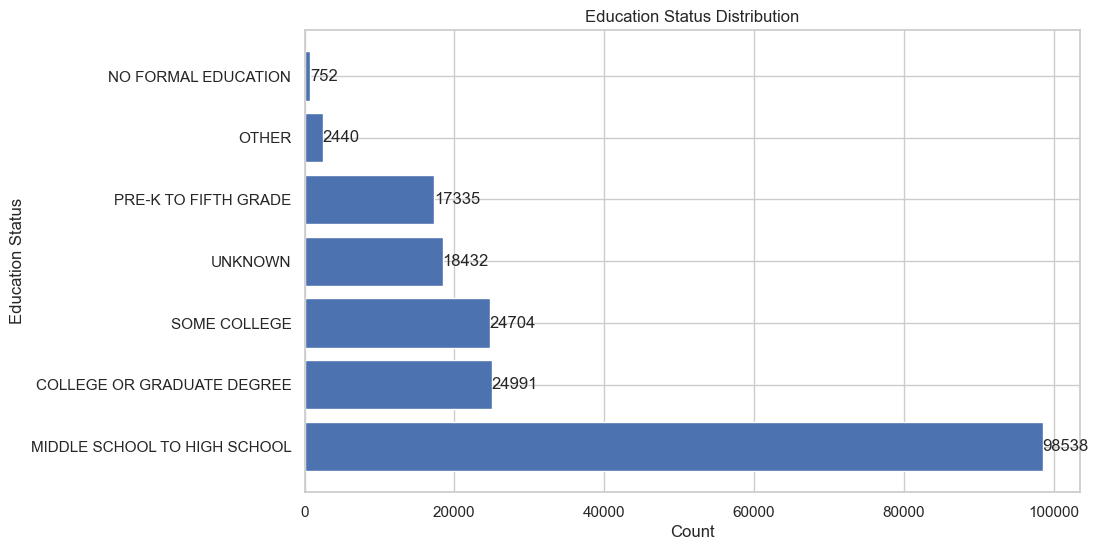

In [117]:
educations_counts = df2['Education Status'].value_counts()
plt.figure(figsize=(10, 6))
plt.barh(educations_counts.index, educations_counts.values)
plt.xlabel('Count')
plt.ylabel('Education Status')
plt.title('Education Status Distribution')
plt.xticks(rotation=0)

for i, v in enumerate(educations_counts.values):
    plt.text(v, i, str(v), ha='left', va='center')

plt.show()

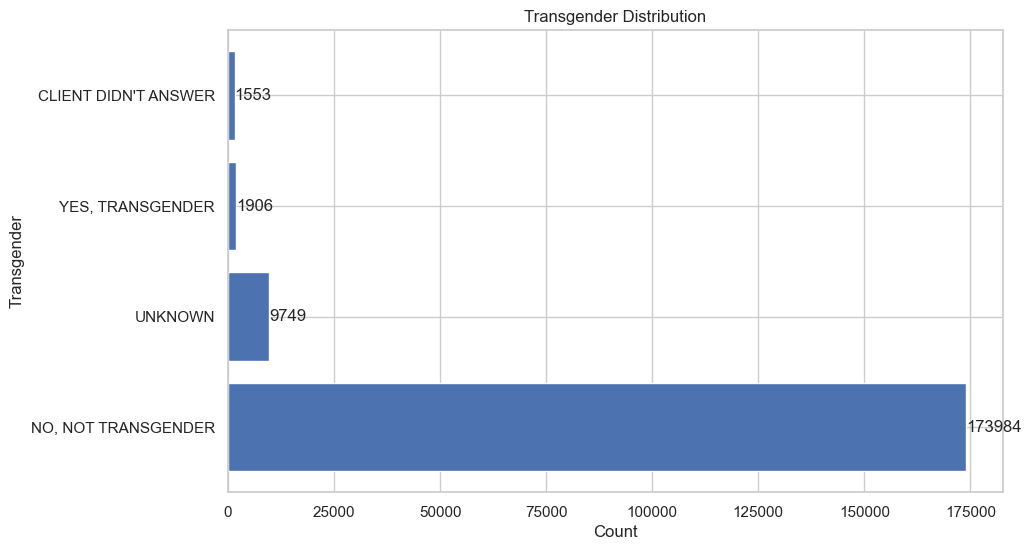

In [119]:
transgender_counts = df2['Transgender'].value_counts()
plt.figure(figsize=(10, 6))
plt.barh(transgender_counts.index, transgender_counts.values)
plt.xlabel('Count')
plt.ylabel('Transgender')
plt.title('Transgender Distribution')
plt.xticks(rotation=0)

for i, v in enumerate(transgender_counts.values):
    plt.text(v, i, str(v), ha='left', va='center')

plt.show()

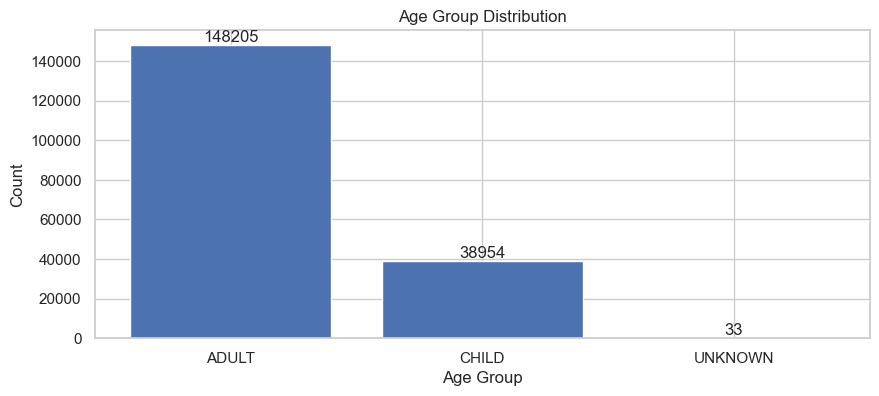

In [123]:
agegroup_counts = df2['Age Group'].value_counts()
plt.figure(figsize=(10,4))
plt.bar(agegroup_counts.index,agegroup_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.xticks(rotation = 0)

for i, v in enumerate(agegroup_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.show()

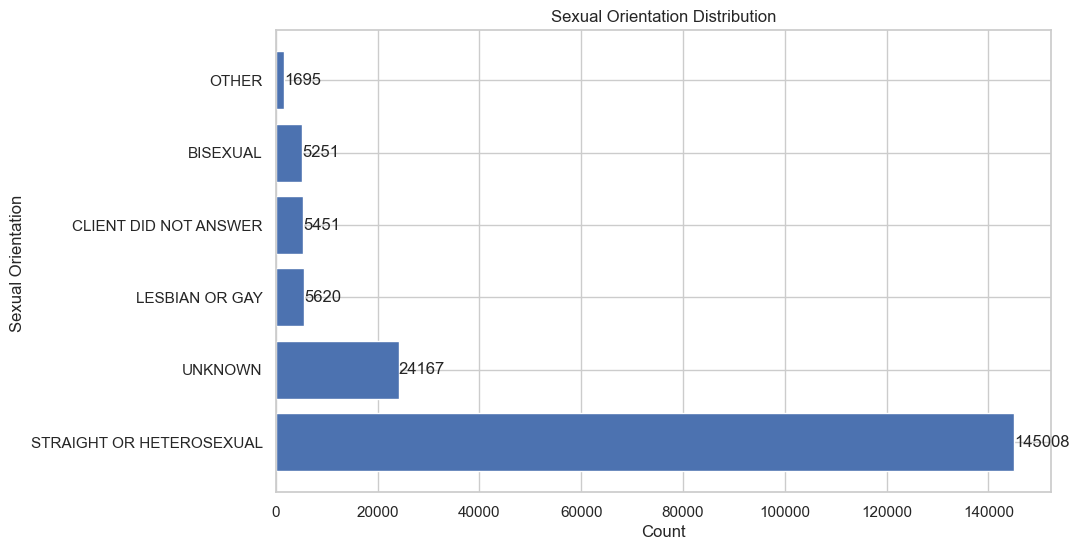

In [125]:
sexualo_counts = df2['Sexual Orientation'].value_counts()
plt.figure(figsize=(10, 6))
plt.barh(sexualo_counts.index, sexualo_counts.values)
plt.xlabel('Count')
plt.ylabel('Sexual Orientation ')
plt.title('Sexual Orientation Distribution')
plt.xticks(rotation=0)

for i, v in enumerate(sexualo_counts.values):
    plt.text(v, i, str(v), ha='left', va='center')

plt.show()

Education Status,COLLEGE OR GRADUATE DEGREE,MIDDLE SCHOOL TO HIGH SCHOOL,NO FORMAL EDUCATION,OTHER,PRE-K TO FIFTH GRADE,SOME COLLEGE,UNKNOWN
Race,,,,,,,
BLACK ONLY,4260,28373,134,652,4203,6080,5086
MULTI-RACIAL,588,2564,23,33,773,628,345
OTHER,3232,18090,218,654,4737,3540,2826
UNKNOWN RACE,399,2523,57,79,971,506,2912
WHITE ONLY,16512,46988,320,1022,6651,13950,7263


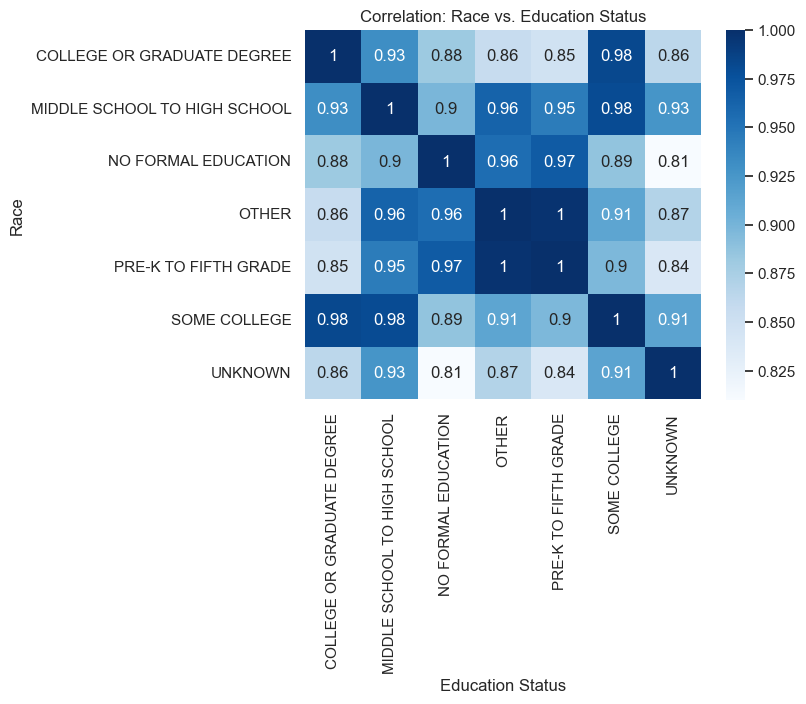

In [143]:
cross_tab = pd.crosstab(df2['Race'], df2['Education Status'])

# Calculate the correlation
cross_tab_corr = cross_tab.corr()

# Create a heatmap of the correlation
sns.heatmap(cross_tab_corr, annot=True, cmap='Blues')

# Add labels and title
plt.xlabel('Education Status')
plt.ylabel('Race')
plt.title('Correlation: Race vs. Education Status')

display(cross_tab)
# Display the plot
plt.show()

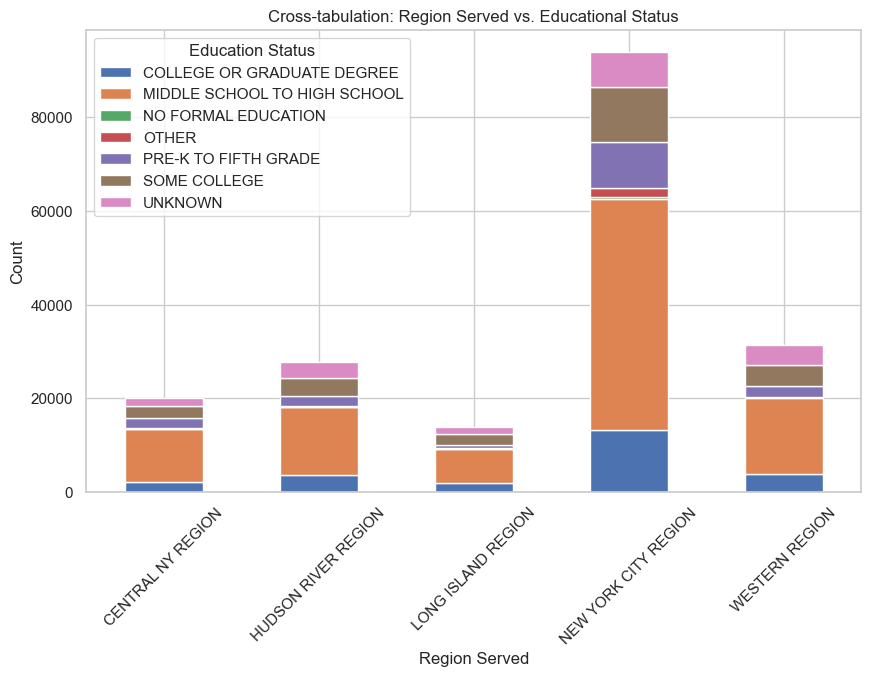

In [171]:
cross_tab = pd.crosstab(df2['Region Served'], df2['Education Status'])

# Create a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Region Served')
plt.ylabel('Count')
plt.title('Cross-tabulation: Region Served vs. Educational Status')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()